In [1]:
import os
import sys
sys.path.append('D:\\Users\\Hegxiten\\workspace\\Rutgers_Railway_security_research\\OOD_Train')

from datetime import datetime, timedelta
import numpy as np
import random
from infrastructure import Track, BigBlock
from signaling import AutoSignal, HomeSignal, AutoPoint, ControlPoint
from system import System
from train import Train
import networkx as nx


In [2]:
sim_init_time = datetime.strptime('2018-01-10 10:00:00', "%Y-%m-%d %H:%M:%S")
sim_term_time = datetime.strptime('2018-01-10 15:30:00', "%Y-%m-%d %H:%M:%S")
sp_container = [random.uniform(0.01, 0.02) for i in range(20)]
acc_container = [0.5*random.uniform(2.78e-05*0.85, 2.78e-05*1.15) for i in range(20)]
dcc_container = [0.2*random.uniform(2.78e-05*0.85, 2.78e-05*1.15) for i in range(20)]
headway = 200 * random.random() + 400
sys = System(sim_init_time, sp_container, acc_container, dcc_container,
             dos_period=['2018-01-10 11:30:00', '2018-01-10 12:30:00'],  
             dos_pos=-1,
             headway=headway, 
             refresh_time=5)

# K166 = Train(idx=sys.train_num, 
#                   rank=sys.train_num, 
#                   system=sys, 
#                   init_time=sys.sys_time, 
#                   init_segment=((sys.signal_points[1],1), (sys.signal_points[2], 0)),
#                   max_sp=sys.sp_container[sys.train_num % len(sys.sp_container)], 
#                   max_acc=sys.acc_container[sys.train_num % len(sys.acc_container)], 
#                   max_dcc=sys.dcc_container[sys.train_num % len(sys.dcc_container)])

T166 = Train(idx=sys.train_num, 
                  rank=sys.train_num, 
                  system=sys, 
                  init_time=sys.sys_time, 
                  init_segment=((sys.signal_points[10],0),(sys.signal_points[9],1)),
                  max_sp=sys.sp_container[sys.train_num % len(sys.sp_container)], 
                  max_acc=sys.acc_container[sys.train_num % len(sys.acc_container)], 
                  max_dcc=sys.dcc_container[sys.train_num % len(sys.dcc_container)],
                  length=1)
T165 = Train(idx=sys.train_num, 
                  rank=sys.train_num, 
                  system=sys, 
                  init_time=sys.sys_time, 
                  init_segment=((None, None),(sys.signal_points[0],0)),
                  max_sp=T166.max_speed*1.6, 
                  max_acc=sys.acc_container[sys.train_num % len(sys.acc_container)], 
                  max_dcc=sys.dcc_container[sys.train_num % len(sys.dcc_container)],
                  length=1)
sys.signal_points[0].open_route((0,1))
sys.signal_points[3].open_route((0,3))
sys.signal_points[10].open_route((1,0))
sys.signal_points[7].open_route((1,0))
sys.signal_points[6].open_route((1,0))
sys.signal_points[4].open_route((1,0))
count=0
while T166.rear_curr_MP>20:
    count+=1
    T166.update_acc()
    T165.update_acc()
    sys.sys_time+=sys.refresh_time
print(count)
sys.signal_points[0].open_route((1,0))
sys.signal_points[3].open_route((1,0))
sys.signal_points[10].open_route((0,1))
sys.signal_points[7].open_route((0,1))
sys.signal_points[6].open_route((0,1))
sys.signal_points[4].open_route((2,1))
count=0
while not T165.stopped:
    count+=1
    T166.update_acc()
    T165.update_acc()
    sys.sys_time+=sys.refresh_time
print(count)

route (0, 1) of ControlPoint0 is opened
route (0, 3) of ControlPoint3 is opened
route (1, 0) of ControlPoint10 is opened
route (1, 0) of ControlPoint7 is opened
route (1, 0) of ControlPoint6 is opened
route (1, 0) of ControlPoint4 is opened
train train index 1, current occupying sections: [((None, None), (ControlPoint0, 0))], head MP:  0.00, rear MP -1.00 initiated entering into track Track MP: 0.0 to MP: 5.0 idx: 0
route (0, 1) of ControlPoint0 is closed
route (1, 0) of ControlPoint7 is closed
route (1, 0) of ControlPoint6 is closed
route (0, 3) of ControlPoint3 is closed
route (1, 0) of ControlPoint4 is closed
503
route (1, 0) of ControlPoint0 is opened
route (1, 0) of ControlPoint3 is opened
route (1, 0) of ControlPoint10 is closed
conflicting routes [(1, 0)] are closed for (0, 1) to open
route (0, 1) of ControlPoint10 is opened
route (0, 1) of ControlPoint7 is opened
route (0, 1) of ControlPoint6 is opened
route (2, 1) of ControlPoint4 is opened
route (2, 1) of ControlPoint4 is clo

In [3]:
print('T166: stopped: {}, \tcurr_MP: {}, curr_spd: {}, tgt_spd: {},\tnum_blk_ahead: {}, \n\taspect: {},'.format(T166.stopped,\
                                                                str("%.2f" % round(T166.curr_MP,2)).rjust(5,' '), \
                                                               str("%.2f" % round(T166.curr_speed*3600,2)).rjust(5,' '), \
                                                               "%.2f" % round(T166.curr_target_spd_abs*3600,2), \
                                                               T166.curr_sig.number_of_blocks_cleared_ahead, \
                                                               T166.curr_sig.aspect))
print('K166: stopped: {}, \tcurr_MP: {}, curr_spd: {}, tgt_spd: {},\tnum_blk_ahead: {}, \n\taspect: {},'.format(K166.stopped,\
                                                                str("%.2f" % round(K166.curr_MP,2)).rjust(5,' '), \
                                                               str("%.2f" % round(K166.curr_speed*3600,2)).rjust(5,' '), \
                                                               "%.2f" % round(K166.curr_target_spd_abs*3600,2), \
                                                               K166.curr_sig.number_of_blocks_cleared_ahead, \
                                                               K166.curr_sig.aspect))


T166: stopped: True, 	curr_MP: 50.00, curr_spd:  0.00, tgt_spd: 0.00,	num_blk_ahead: 0, 
	aspect: Aspect: r, 	 route None, target speed 0.0 mph,


NameError: name 'K166' is not defined

In [8]:
print(T166.rear_curr_MP)

25.31344088430427


route (0, 1) of ControlPoint0 is opened
route (0, 3) of ControlPoint3 is opened
route (1, 0) of ControlPoint10 is opened
route (1, 0) of ControlPoint7 is opened
route (1, 0) of ControlPoint6 is opened
route (1, 0) of ControlPoint4 is opened
train train index 1, current occupying sections: [((None, None), (ControlPoint0, 0))], head MP:  0.00, rear MP -1.00 initiated entering into track Track MP: 0.0 to MP: 5.0 idx: 0
route (0, 1) of ControlPoint0 is closed
route (1, 0) of ControlPoint7 is closed
route (1, 0) of ControlPoint6 is closed
route (0, 3) of ControlPoint3 is closed
route (1, 0) of ControlPoint4 is closed
17
route (1, 0) of ControlPoint0 is opened
route (1, 0) of ControlPoint3 is opened
route (1, 0) of ControlPoint10 is closed
conflicting routes [(1, 0)] are closed for (0, 1) to open
route (0, 1) of ControlPoint10 is opened
route (0, 1) of ControlPoint7 is opened
route (0, 1) of ControlPoint6 is opened
route (2, 1) of ControlPoint4 is opened
route (1, 0) of ControlPoint3 is clos

In [17]:
print('MP:\t\t', T166.curr_MP)
print('curr_speed\t\t',T166.curr_speed * 3600)
print(T166.curr_sig.governed_track.routing)
print('curr_tgt_speed\t\t',T166.curr_target_spd_abs * 3600)
print('curr_spd_lmt\t\t',T166.curr_spd_lmt_abs * 3600)
print('\n')
print(T166.curr_acc)
print('brk_dis\t\t',T166.curr_brake_distance_abs)
print('sig_dis\t\t',T166.curr_dis_to_curr_sig_abs)
print(T166.curr_sig.aspect)
for t in sys.tracks:
    print(t, t.train)

MP:		 27.832402750765933
curr_speed		 -65.0
((ControlPoint6, 0), (AutoPoint5, 1))
curr_tgt_speed		 40.0
curr_spd_lmt		 65.0


2.765432098765432e-05
brk_dis		 3.662109374999999
sig_dis		 2.832402750765933
Aspect: yy, 	 route (1, 0), target speed 40.0 mph
Track MP: 0.0 to MP: 5.0 idx: 0 []
Track MP: 5.0 to MP: 10.0 idx: 0 []
Track MP: 10.0 to MP: 15.0 idx: 0 [train index 1, current occupying sections: [((AutoPoint2, 1), (ControlPoint3, 0))], head MP: 12.50, rear MP 11.50]
Track MP: 15.0 to MP: 20.0 idx: 0 []
Track MP: 15.0 to MP: 20.0 idx: 1 []
Track MP: 20.0 to MP: 25.0 idx: 0 []
Track MP: 25.0 to MP: 30.0 idx: 0 [train index 0, current occupying sections: [((ControlPoint6, 0), (AutoPoint5, 1))], head MP: 27.83, rear MP 28.83]
Track MP: 30.0 to MP: 35.0 idx: 0 []
Track MP: 30.0 to MP: 35.0 idx: 1 []
Track MP: 35.0 to MP: 40.0 idx: 0 []
Track MP: 40.0 to MP: 45.0 idx: 0 []
Track MP: 45.0 to MP: 50.0 idx: 0 []


In [14]:
print('MP:\t\t', T165.curr_MP)
print('curr_speed\t\t',T165.curr_speed * 3600)
print(T165.curr_sig.governed_track.routing)
print('curr_tgt_speed\t\t',T165.curr_target_spd_abs * 3600)
print('curr_spd_lmt\t\t',T165.curr_spd_lmt_abs * 3600)
print('\n')
print(T165.curr_acc)
print('brk_dis\t\t',T165.curr_brake_distance_abs)
print('sig_dis\t\t',T165.curr_dis_to_curr_sig_abs)

MP:		 15.140266033221975
curr_speed		 20.088888888888896
((ControlPoint3, 3), (ControlPoint4, 2))
curr_tgt_speed		 0.0
curr_spd_lmt		 20.0




AssertionError: 

In [27]:
((-40.52928446657999/3600)**2-(40/3600)**2)/(2*2.765432098765432e-05)

0.059462750241297324

In [15]:
for n in range(3600):
    print('T166: stopped: {}, \tcurr_MP: {}, \tcurr_spd: {}, \ttgt_spd: {},\tbrk_dis: {}, \tacc: {},'.format(T166.stopped,\
                                                                    str("%.2f" % round(T166.curr_MP,2)).rjust(5,' '), \
                                                                   "%.2f" % round(T166.curr_speed*3600,2), \
                                                                   "%.2f" % round(T166.curr_target_spd_abs*3600,2), \
                                                                   "%.2f" % round(T166.curr_brake_distance_abs,2), \
                                                                   "%.10f" % round(T166.curr_acc,10)))
    print('K166: stopped: {}, \tcurr_MP: {}, \tcurr_spd: {}, \ttgt_spd: {},\tbrk_dis: {}, \tacc: {},'.format(K166.stopped,\
                                                                    str("%.2f" % round(K166.curr_MP,2)).rjust(5,' '), \
                                                                   "%.2f" % round(K166.curr_speed*3600,2), \
                                                                   "%.2f" % round(K166.curr_target_spd_abs*3600,2), \
                                                                   "%.2f" % round(K166.curr_brake_distance_abs,2), \
                                                                   "%.10f" % round(K166.curr_acc,10)))
    K166.update_acc()
    T166.update_acc()
    sys.sys_time+=sys.refresh_time

T166: stopped: True, 	curr_MP: 30.00, 	curr_spd: 0.00, 	tgt_spd: 0.00,	brk_dis: 0.00, 	acc: 0.0000000000,


NameError: name 'K166' is not defined

In [35]:
for i in range(len(sys.signal_points)):
    print(i, sys.signal_points[i].signal_by_port[1].aspect)

0 Aspect: r, 	 route None, target speed 0.0 mph
1 Aspect: r, 	 route None, target speed 0.0 mph
2 Aspect: r, 	 route None, target speed 0.0 mph
3 Aspect: r, 	 route None, target speed 0.0 mph
4 Aspect: r, 	 route None, target speed 0.0 mph
5 Aspect: r, 	 route None, target speed 0.0 mph
6 Aspect: r, 	 route None, target speed 0.0 mph
7 Aspect: r, 	 route None, target speed 0.0 mph
8 Aspect: y, 	 route (1, 0), target speed 20.0 mph
9 Aspect: yy, 	 route (1, 0), target speed 40.0 mph
10 Aspect: yy, 	 route (1, 0), target speed 40.0 mph


In [17]:
T166.pos_spd_list[-10][2]*3600

65.0

In [66]:
for n in range(3600):
    print('k165: curr_MP: {}, curr_spd: {}, curr_tgt_spd'.format(k165.curr_MP, k165.curr_speed, k165.curr_target_spd_abs))
    print('k166: curr_MP: {}, curr_spd: {}, curr_tgt_spd'.format(k166.curr_MP, k166.curr_speed, k166.curr_target_spd_abs))
    k166.update_acc()
    k165.update_acc()
    sys.sys_time+=1

NameError: name 'k165' is not defined

In [9]:
T166.__dict__

{'length': 1,
 'system': <system.System at 0x1cd4e8cd6a0>,
 '_curr_routing_path_segment': ((ControlPoint10, 0), (AutoPoint9, 1)),
 '_curr_occuping_routing_path': [((ControlPoint10, 0), (AutoPoint9, 1))],
 '_curr_MP': 45.02761488245889,
 '_rear_curr_MP': 46.02761488245889,
 'train_idx': 0,
 'rank': 0,
 'max_speed': 0.01582303500478074,
 'max_acc': 2.7732485705590512e-05,
 'max_dcc': 3.0610157135983994e-05,
 '_curr_speed': -0.018055555555555554,
 '_curr_spd_lmt_abs': 0.018055555555555554,
 '_stopped': False,
 'time_pos_list': [[1515596400.0, 50.0],
  [1515596400.0, 49.99998613375715],
  [1515596401.0, 49.99994453502859],
  [1515596402.0, 49.99987520381433],
  [1515596403.0, 49.99977814011436],
  [1515596404.0, 49.999653343928685],
  [1515596405.0, 49.999500815257306],
  [1515596406.0, 49.99932055410022],
  [1515596407.0, 49.999112560457434],
  [1515596408.0, 49.99887683432894],
  [1515596409.0, 49.99861337571473],
  [1515596410.0, 49.99832218461482],
  [1515596411.0, 49.998003261029204],

In [4]:
print('T166: stopped: {}, \tcurr_MP: {}, \tcurr_spd: {}, \ttgt_spd: {},\tnum_blk_ahead: {}, \taspect: {},'.format(T166.stopped,\
                                                                str("%.2f" % round(T166.curr_MP,2)).rjust(5,' '), \
                                                               "%.2f" % round(T166.curr_speed*3600,2), \
                                                               "%.2f" % round(T166.curr_target_spd_abs*3600,2), \
                                                               T166.curr_sig.number_of_blocks_cleared_ahead, \
                                                               T166.curr_sig.aspect))
print('K166: stopped: {}, \tcurr_MP: {}, \tcurr_spd: {}, \ttgt_spd: {},\tnum_blk_ahead: {}, \taspect: {},'.format(K166.stopped,\
                                                                str("%.2f" % round(K166.curr_MP,2)).rjust(5,' '), \
                                                               "%.2f" % round(K166.curr_speed*3600,2), \
                                                               "%.2f" % round(K166.curr_target_spd_abs*3600,2), \
                                                               K166.curr_sig.number_of_blocks_cleared_ahead, \
                                                               K166.curr_sig.aspect))

T166: stopped: True, 	curr_MP:  0.00, 	curr_spd: 0.00, 	tgt_spd: 0.00,	num_blk_ahead: 0, 	aspect: Aspect: r, 	 route None, target speed 0.0 mph,


NameError: name 'K166' is not defined

In [11]:
for t in sys.tracks:
    print(t.routing,t.train)
print('\n')
for b in sys.bigblocks:
    print(b.routing)

((ControlPoint0, 1), (AutoPoint1, 0)) []
((AutoPoint1, 1), (AutoPoint2, 0)) []
((AutoPoint2, 1), (ControlPoint3, 0)) [train index 1, current occupying sections: [((AutoPoint2, 1), (ControlPoint3, 0))], head MP: 15.00, rear MP 14.00]
None []
None []
None []
None []
None []
None []
None []
None []
None []


((ControlPoint0, 1), (ControlPoint3, 0))
None
None
None
None
None
None


In [43]:
sys.trains

[train index 0, current segment/direction ((AutoPoint1, 1), (AutoPoint2, 0)),
 train index 1, current segment/direction ((None, None), (ControlPoint0, 0))]

In [31]:
mc.normal_method('static to call')

normal method: <__main__.MyClass object at 0x0000025F2A2F3B00> static to call
calling static method: <__main__.MyClass object at 0x0000025F2A2F3B00> static to call


NameError: name 'static_method' is not defined

No handles with labels found to put in legend.


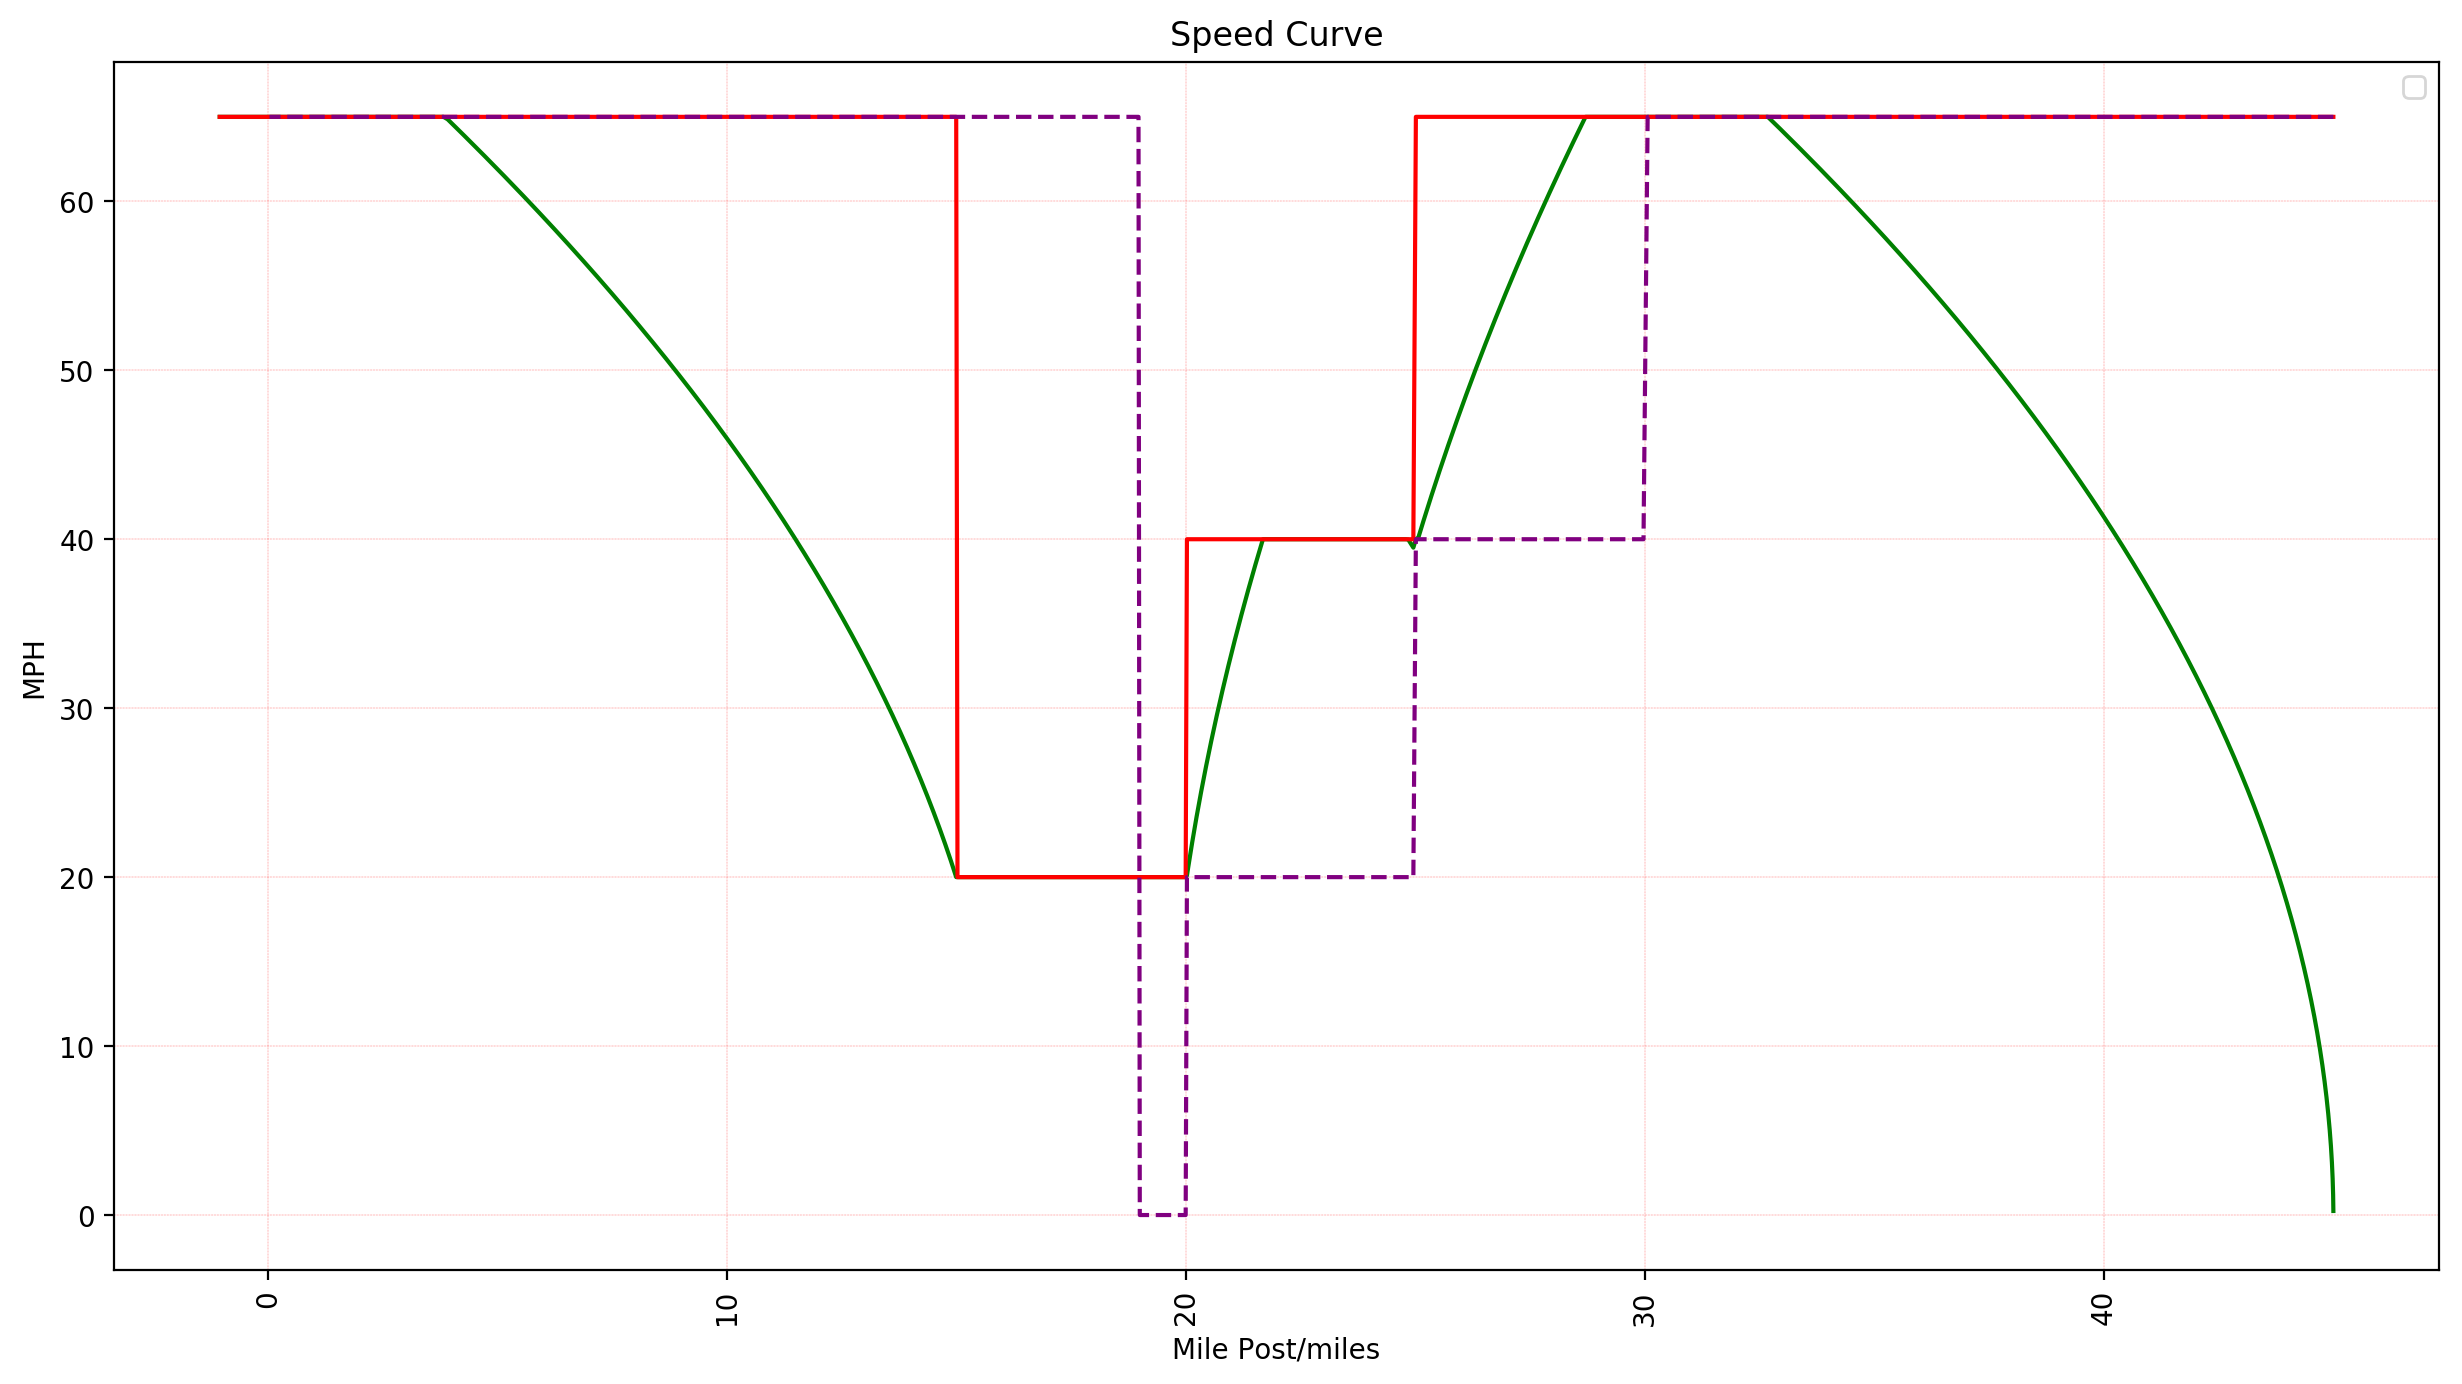

<Figure size 1440x1280 with 0 Axes>

In [5]:
from infrastructure import Track,BigBlock
from system import System
from train import Train
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np
def string_diagram(sys, start_time, end_time):
    '''To draw the string diagram based on the schedule dictionary for all the trains. 
    '''
    colors = ['red','green','blue','black','orange','cyan','magenta']
    color_num = len(colors)
    x, y = [], []
    for i in range(len(sys.trains)):
        x.append([])
        y.append([])
        for j in range(len(sys.trains[i].time_pos_list)):
            x[i].append(datetime.fromtimestamp(sys.trains[i].time_pos_list[j][0]))
            y[i].append(sys.trains[i].time_pos_list[j][1])
            # x[i].append(sys.trains[i].time_pos_list[j][0])
            # y[i].append(sys.trains[i].time_pos_list[j][1])

    assert len(x) == len(y)
    for i in range(len(x)):
        assert len(x[i]) == len(y[i])
    train_idx = list(range(len(x)))
    t_color = [colors[x.index(i)%color_num] for i in x]
    min_t, max_t = min([i[0] for i in x if i]), max([i[-1] for i in x if i])
    
    #plt.ion()
    plt.title('String Diagram')
    hours = mdates.HourLocator()
    minutes = mdates.MinuteLocator()
    seconds = mdates.SecondLocator()
    dateFmt = mdates.DateFormatter("%H:%M")
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_minor_locator(minutes)
    plt.gca().xaxis.set_major_formatter(dateFmt)
    plt.xticks(rotation=90)
    plt.grid(True, linestyle = "-.", color = "r", linewidth = "0.1")
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Mile Post/miles')
    start_time = int(start_time.timestamp())
    end_time = int(end_time.timestamp())
    plt.axis([(datetime.fromtimestamp(start_time - 500)), \
            (datetime.fromtimestamp(end_time + 500)), -5 , 55])
    #===============================================================================
    # time_length = end_time - start_time
    # step_size = 10
    # for start in range(1,time_length + 1, step_size):
    #     plt.axis([(datetime.fromtimestamp(start_time - 500)), \
    #         (datetime.fromtimestamp(end_time + 500)), -5 , 55])
         
    #     for n in range(len(x)-1):
    #         new_x_y = [[mdates.date2num(datetime.fromtimestamp(i)), j] for i, j in zip(x[n], y[n]) if i < start_time + start and i > start_time + start - 1 - step_size]
    #         new_x = []
    #         new_y = []
    #         for i , j in new_x_y:
    #             new_x.append(i)
    #             new_y.append(j)
    #         if(len(new_x) == 0):
    #             continue
    #         plt.plot(new_x, new_y, color=t_color[n])
    #         # print('==============')
    #         # print('Length of new_x: {}'.format(len(new_x)))
    #         # print('Length of new_y: {}'.format(len(new_y)))
    #     plt.pause(0.00001)
    #===============================================================================
    for n in range(len(x)):
        #assert len(x[n]) == len(y[n]) == t_color[n]
        plt.plot([mdates.date2num(i) for i in x[n]], y[n], color=t_color[n])
    plt.gca().axhspan(15,20,color='yellow',alpha=0.5)
    plt.gca().axhspan(30,35,color='yellow',alpha=0.5)
#     plt.gca().axvspan((datetime.fromtimestamp(start_time + 90 * 60)),(datetime.fromtimestamp(start_time + 150 * 60)),color='black',alpha=0.5)
    plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.dpi'] = 200
    import pylab; pylab.rcParams['figure.figsize'] = (15.0, 8.0)
    plt.show()
    #plt.ioff()
def speed_curve(sys, train):
    '''To draw the speed curve based on a train's mileposts and speed . 
    '''
    colors = ['red','green','purple']
    mp, spd, spdlmt, tgt_spd = [], [], [], []
    for i in range(len(train.pos_spd_list)):
        mp.append(train.pos_spd_list[i][0])
        spd.append(abs(train.pos_spd_list[i][1]*3600))
        spdlmt.append(train.pos_spd_list[i][2]*3600)
        tgt_spd.append(train.pos_spd_list[i][3]*3600)

    min_mp, max_mp = min(mp), max(mp)
    
    #plt.ion()
    plt.title('Speed Curve')
    plt.xticks(rotation=90)
    plt.grid(True, linestyle = "-.", color = "r", linewidth = "0.1")
    plt.legend()
    plt.xlabel('Mile Post/miles')
    plt.ylabel('MPH')
    plt.plot(mp, spd, color=colors[1])  # train speed
    plt.plot(mp, spdlmt, color=colors[0])  # train speed lmt
    plt.plot(mp, tgt_spd, '--', color=colors[2])  # train tgt speed
    
    plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.dpi'] = 200
    import pylab; pylab.rcParams['figure.figsize'] = (15.0, 8.0)
    plt.show()
    #plt.ioff()
# string_diagram(sys, sim_init_time, sim_term_time)
speed_curve(sys, T166)

In [16]:
while not T165.stopped:
    T166.update_acc()
    T165.update_acc()
    sys.sys_time += sys.refresh_time

route (0, 1) of ControlPoint10 is closed


In [12]:
T166.curr_speed * T166.system.refresh_time + 0.5 * T166.curr_acc * T166.system.refresh_time ** 2

AssertionError: 

In [38]:
T165.update_acc()
sys.sys_time+=sys.refresh_time
print('MP:\t\t', T165.curr_MP)
print('curr_speed\t\t',T165.curr_speed * 3600)
print('curr_tgt_speed\t\t',T165.curr_target_spd_abs * 3600)
print('curr_spd_lmt\t\t',T165.curr_spd_lmt_abs * 3600)
print('\n')
print('curr_acc\t\t',T165.curr_acc)
print('brk_dis\t\t',T165.curr_brake_distance_abs)
print('sig_dis\t\t',T165.curr_dis_to_curr_sig_abs)
print('\n')
print('upcoming speed\t\t', (T165.curr_speed+T165.curr_acc*sys.refresh_time)*3600)
print('upcoming delta_s\t', (T165.curr_speed*sys.refresh_time+0.5*T165.curr_acc*sys.refresh_time**2))
print('upcoming MP\t\t', (T165.curr_MP+T165.curr_speed*sys.refresh_time+0.5*T165.curr_acc*sys.refresh_time**2))
speed_curve(sys, T165)

route (0, 3) of ControlPoint3 is closed
MP:		 15.100501278630388
curr_speed		 20.088888888888896
curr_tgt_speed		 0.0
curr_spd_lmt		 20.0




AssertionError: 

In [8]:
sys.signal_points[3].open_route((1,0))
T166.update_acc()
sys.sys_time+=sys.refresh_time


route (1, 0) for ControlPoint3 already opened
route (1, 0) of ControlPoint3 is closed


In [30]:
T166.curr_target_spd_abs*3600

40.0

In [31]:
delta_s = T166.curr_speed * T166.system.refresh_time + 0.5 * (-T166.max_acc) * T166.system.refresh_time**2

In [32]:
(T166.curr_sig.MP-T166.curr_MP)*(T166.curr_sig.MP-(T166.curr_MP+delta_s))

-0.06333881577705458